In [40]:
%pylab inline
import numpy as np
from astropy.modeling import Parameter, Parametric1DModel, Parametric2DModel
from astropy.modeling import models
from astropy import convolution

Populating the interactive namespace from numpy and matplotlib


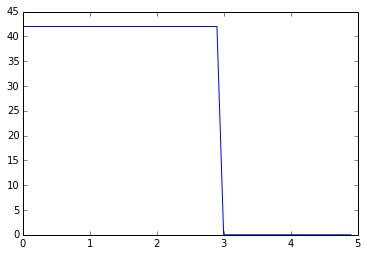

In [41]:
class Step1D(Parametric1DModel):
    """One-dimensional step model.
    """
    amplitude = Parameter('amplitude')
    r_0 = Parameter('r_0')

    def __init__(self, amplitude, r_0):
        super(Step1D, self).__init__(amplitude=amplitude, r_0=r_0)

    @staticmethod
    def eval(r, amplitude, r_0):
        return np.where(r < r_0, amplitude, 0)

step1d = Step1D(42, 3)
x = np.arange(0, 5, 0.1)
y = step1d(x)
plt.plot(x, y);

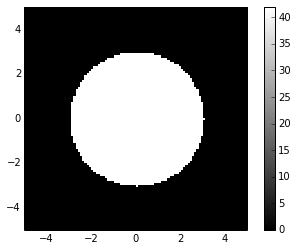

In [44]:
class Step2D(Parametric2DModel):
    """Two-dimensional step model.
    """
    amplitude = Parameter('amplitude')
    r_0 = Parameter('r_0')

    def __init__(self, amplitude, r_0):
        super(Step2D, self).__init__(amplitude=amplitude, r_0=r_0)

    @staticmethod
    def eval(x, y, amplitude, r_0):
        r2 = x * x + y * y
        return np.where(r2 < r_0 * r_0, amplitude, 0)

step2d = Step2D(42, 3)
x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
z = step2d(x, y)
plt.imshow(z, extent=[-5, 5, -5, 5], cmap='gray', interpolation='nearest')
plt.colorbar();

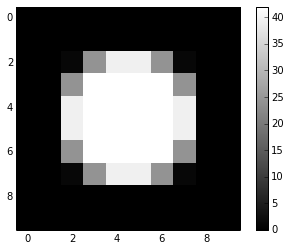

In [53]:
from astropy.convolution import Model2DKernel

step2d_kernel = Model2DKernel(step2d, x_size=10, mode='oversample')
plt.imshow(step2d_kernel.array, cmap='gray', interpolation='nearest')
plt.colorbar();